In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('salaris.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

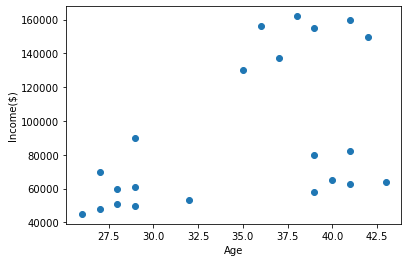

In [3]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
y_predict=kmeans.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
df['cluster']=y_predict

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [15]:
kmeans.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

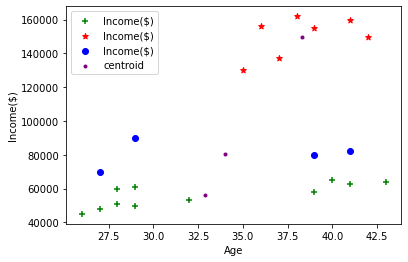

In [25]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',marker='+',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',marker='*',label="Income($)")
plt.scatter(df3.Age,df3['Income($)'],color='blue',label='Income($)')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker=".",label='centroid')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
minmaxscaler.fit(df[['Income($)']])
df['Income($)']=minmaxscaler.transform(df[['Income($)']])

minmaxscaler.fit(df[['Age']])
df['Age']=minmaxscaler.transform(df[['Age']])



In [33]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


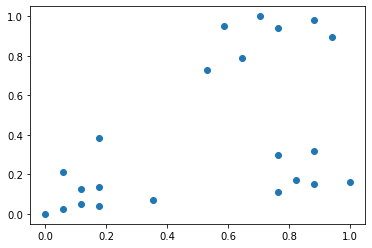

In [34]:
plt.scatter(df.Age,df['Income($)'])

In [37]:
kmeans=KMeans(n_clusters=3)
y_predict=kmeans.fit_predict(df[['Age','Income($)']])

In [38]:
df['cluster']=y_predict

In [39]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [40]:
kmeans.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

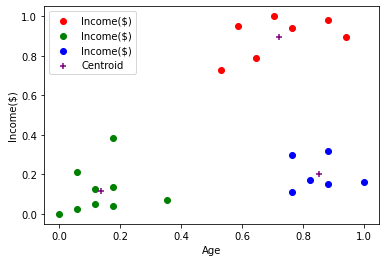

In [43]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0.Age,df0['Income($)'],color='red',label='Income($)')
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='blue',label='Income($)')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='Centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

# Elbo point

In [45]:
sse=[]
k_rang=range(1,10)
for k in k_rang:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Age','Income($)']])
    sse.append(kmeans.inertia_)

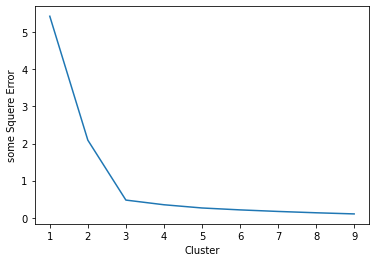

In [48]:
plt.xlabel("Cluster")
plt.ylabel("some Squere Error")
plt.plot(k_rang,sse)